 <h1 align="center"> IBM Workshop -  Deep Learning by Hacksh4w </h1>
 
## Before Deep Learning 
- Thorough study of Traditional ML Techniques & Algo's, Regression
- GAN, CNN, RNN Project

## Notes
 - Regression <= Numerical Data/Quantity, Decision Tree 
 - Classification <= Naive Bayes, Logistic Regression, Decision Tree

## To Check Out
- Statistical Modelling, Labelled Data, Clustering (Unsupervised Learning - ) 
- Ensemble Models
    
### Trivia 
- In Supervised Learning, the data is the supervisor; Has labelled Data
- In Unsupervised Learning, although it may begin with unstructured data, the data has to first be structured for further operations; via clustering
    - 'k' means Clustering; Unsupervised
        
    

##  Linear Regression
- Linearrr
- Same as y = mx + c
- c and m found via regression algo models

-- Sum of squares of erros is minimum. 

- <h3> Cross validation</h3>: try normal avg, and then compute sets of avg with "leave one out" ,ie: suppose there are entries from 1 to 20. so 1st one is : avg of all entries except 1 -5; similarly for batch 2: sum of all avg leaving 6- 11 and so on.  
     - If, the avg of these averages of better than overall avgerage, then we can choose the cross validation Model

In [45]:
import pandas as mypd
import matplotlib.pyplot as myplot
import seaborn as mysb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score 

In [46]:
mydata = mypd.read_csv("Mult_Reg_Yield.csv")
mydata          

,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7
5,194,192,82.0
6,143,220,34.5
7,186,235,95.4
8,139,240,56.7
9,188,230,84.4


In [47]:
mydata.describe()
# To check for missing values in it
# Quartile Deviation
# TO Check Outliers <= Easiest Method : By making a boxplot

,Time,Temperature,Yield
count,16.000000,16.000000,16.000000
mean,163.937500,213.062500,66.981250
std,23.450569,17.650189,23.705336
min,130.000000,176.000000,34.500000
25%,142.000000,203.750000,44.100000
50%,169.500000,214.000000,69.200000
75%,186.500000,226.250000,86.150000
max,194.000000,240.000000,98.300000


In [48]:
#delete rows with missing values
mydata.dropna()

,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7
5,194,192,82.0
6,143,220,34.5
7,186,235,95.4
8,139,240,56.7
9,188,230,84.4


In [49]:
mydata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         16 non-null     int64  
 1   Temperature  16 non-null     int64  
 2   Yield        16 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 516.0 bytes


In [50]:
#revtime.fillna(rev_time_mean, inplace = True)  
# revtime is from finding the mean via the above methods.

- ?(Text data can be used to perform exploratory data analysis)
- mean, medium for numerical

<function matplotlib.pyplot.show(close=None, block=None)>

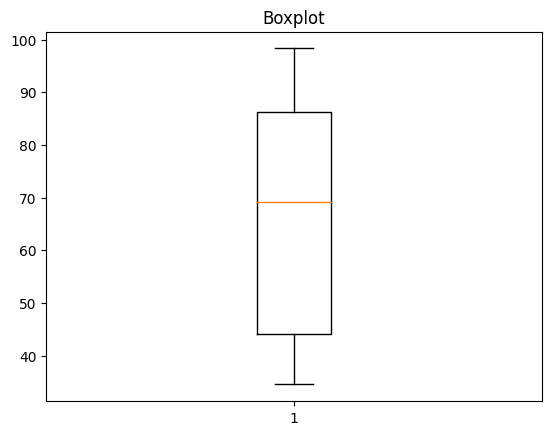

In [51]:
#boxplot 
myplot.boxplot(mydata["Yield"])
myplot.title("Boxplot")
myplot.show  

# Out liers will lie on the T ie; as in is the T. Box inte molil and thaazhe

In [52]:
# except for reqd wuantitu, let it be Y; all other variables are treated as independant variables and givren on common naming
# we employ this using iloc
x = mydata.iloc[:,0:2]  # to select time temp and yield columns
x

,Time,Temperature
0,130,190
1,174,176
2,134,205
3,191,210
4,165,230
5,194,192
6,143,220
7,186,235
8,139,240
9,188,230


In [53]:
y = mydata.Yield
y

0     35.0
1     81.7
2     42.5
3     98.3
4     52.7
5     82.0
6     34.5
7     95.4
8     56.7
9     84.4
10    94.3
11    44.3
12    83.3
13    91.4
14    43.5
15    51.7
Name: Yield, dtype: float64

<module 'seaborn' from 'C:\\Users\\mrina\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\seaborn\\__init__.py'>

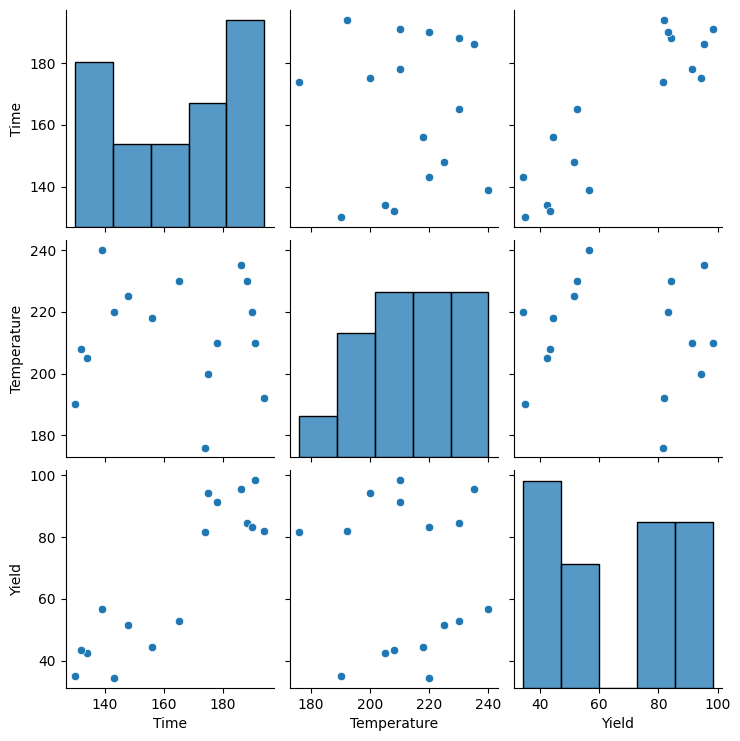

In [54]:
#Making scatterplots taking them 2 at a time. Yield fixed along one axis and the other's taken 1 at a time with yield on the other axis
# matplotlib = 1 plot, seaborn eduthaal, ellam kittum
mysb.pairplot(mydata)
mysb

In [55]:
mymodel = LinearRegression()
mymodel

mymodel = mymodel.fit(x,y)
mymodel

LinearRegression()

In [61]:
b = mymodel.coef_
b
# to find values of B1 B2 
# B0 is intercept

array([ 0.90608862, -0.06418911])

In [62]:
 a = mymodel.intercept_
a

-67.8843597036845

In [63]:
#logistic regression, sigmoid value always lies between 0 and 1

yi = a + b * Time 
yield  = b0 + b* time + b1 * temperature
take diff of actual in table  - predicted

the diff - 1.2  = error or residuals
Aim : - Error minimization

In [64]:
rsq = mymodel.score(x,y)
rsq
round(rsq*100,2)

80.64

In [65]:
pred = mymodel.predict(x)
pred

array([37.71122898, 78.47777573, 40.37274675, 91.69885237, 66.85676605,
       95.57252226, 47.5647076 , 85.56368144, 42.65657086, 87.69680424,
       77.84332562, 59.47223785, 90.15087261, 79.91970034, 38.36800217,
       51.77420512])

In [66]:
mse = mean_squared_error(y,pred)
mse

102.00508614219636

In [67]:
import math as mymath
rmse = mymath.sqrt(mse)
rmse

10.099756736783137

In [68]:
res = y-pred
res

0     -2.711229
1      3.222224
2      2.127253
3      6.601148
4    -14.156766
5    -13.572522
6    -13.064708
7      9.836319
8     14.043429
9     -3.296804
10    16.456674
11   -15.172238
12    -6.850873
13    11.480300
14     5.131998
15    -0.074205
Name: Yield, dtype: float64

In [69]:
mymodel.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

Here we use time and temp to calc. 
but we do not know hwther any other combination (ie; time only or tempt only) of variables/factors would be more sduited for this model
this will be based on probaility corresponding to time